In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-12-02 01:15:41.287226: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
tf.__version__

'2.9.1'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Load image and apply preprocess_input function
train_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32)

Found 3068 images belonging to 10 classes.


In [5]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [6]:
!ls -l clothing-dataset-small/train

total 252
drwxrwsr-x 2 jovyan jovyan 20480 Nov 20 11:40 dress
drwxrwsr-x 2 jovyan jovyan 12288 Nov 20 11:40 hat
drwxrwsr-x 2 jovyan jovyan 36864 Nov 20 11:40 longsleeve
drwxrwsr-x 2 jovyan jovyan 20480 Nov 20 11:40 outwear
drwxrwsr-x 2 jovyan jovyan 36864 Nov 20 11:40 pants
drwxrwsr-x 2 jovyan jovyan 20480 Nov 20 11:40 shirt
drwxrwsr-x 2 jovyan jovyan 20480 Nov 20 11:40 shoes
drwxrwsr-x 2 jovyan jovyan 20480 Nov 20 11:40 shorts
drwxrwsr-x 2 jovyan jovyan 12288 Nov 20 11:40 skirt
drwxrwsr-x 2 jovyan jovyan 57344 Nov 20 11:40 t-shirt


In [7]:
# return 2 things, X and y, X is input with preprocess_input function applied
X, y = next(train_ds)

In [8]:
X.shape

(32, 150, 150, 3)

In [9]:
# This is one hot encoding applied to target 
y

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 

In [10]:
# Loading Validation data same as above

# Load image and apply preprocess_input function
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False) # WE don't need to shuffle since its just for validating

Found 341 images belonging to 10 classes.


In [11]:
base_model = Xception(
    weights='imagenet',
    include_top = False, # don't include the top most layer that is dense layer
    input_shape=(150, 150, 3)
    )

base_model.trainable = False # when we train our model, we don't want to change convolutional layers

2023-12-02 01:15:53.100754: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-02 01:15:53.108073: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-02 01:15:53.108691: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-02 01:15:53.109779: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [12]:
# Create new top

#input our tshirt
inputs = keras.Input(shape=(150, 150, 3))

# we use our base model to extract this vector representation
# Then we apply base model to inputs and it produces 3 dimensional map
base = base_model(inputs, training=False)

#now we turn it into 1 dimensional vector using pooling
# pooling = keras.layers.GlobalAveragePooling2D()
# vectors = pooling(base)
vectors = keras.layers.GlobalAveragePooling2D()(base)

# 10 dense layers because we have 10 classes
outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [13]:
preds = model.predict(X)

2023-12-02 01:16:04.603490: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-12-02 01:16:05.236710: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-02 01:16:05.237202: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-02 01:16:05.237234: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-12-02 01:16:05.237901: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-02 01:16:05.238001: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [14]:
preds.shape

(32, 10)

In [15]:
preds[0] # Bunch of randoim numbers initialised

array([-0.45782596, -0.2997129 ,  0.92232966, -0.7433842 ,  0.71863717,
       -0.20187292, -0.07025799,  1.3366224 , -0.47604635, -0.47876465],
      dtype=float32)

In [16]:
#Training the model, we need a couple of things

# 1. optimizer - Finding best weights formodel. How? by changing each element of the matrix and checkign if it leads to better solution. We do it many many times
# 2. 

In [17]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification

In [18]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [20]:
# history = model.fit(train_ds, epochs=10, validation_data=val_ds) # epochs, go over dataset once means 1 epoch

In [21]:
# plt.plot(history.history['accuracy'], label='train')
# plt.plot(history.history['val_accuracy'], label='val')

# plt.xticks(np.arange(10))

# plt.legend()

In [22]:
# Learning rate = How fast you can read

In [19]:
def make_model(learning_rate = 0.01):
    base_model = Xception(
    weights='imagenet',
    include_top = False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False
    
    ###########################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    ###########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [23]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate = lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 17s 156ms/step - loss: 1.9628 - accuracy: 0.3338 - val_loss: 1.6472 - val_accuracy: 0.4663
Epoch 2/10
96/96 [==============================] - 11s 113ms/step - loss: 1.4137 - accuracy: 0.5476 - val_loss: 1.2975 - val_accuracy: 0.6012
Epoch 3/10
96/96 [==============================] - 11s 113ms/step - loss: 1.1706 - accuracy: 0.6327 - val_loss: 1.1037 - val_accuracy: 0.6598
Epoch 4/10
96/96 [==============================] - 11s 114ms/step - loss: 1.0251 - accuracy: 0.6780 - val_loss: 0.9874 - val_accuracy: 0.7009
Epoch 5/10
96/96 [==============================] - 11s 113ms/step - loss: 0.9272 - accuracy: 0.7050 - val_loss: 0.9048 - val_accuracy: 0.7126
Epoch 6/10
96/96 [==============================] - 11s 112ms/step - loss: 0.8546 - accuracy: 0.7291 - val_loss: 0.8497 - val_accuracy: 0.7449
Epoch 7/10
96/96 [==============================] - 11s 113ms/step - loss: 0.7994 - accuracy: 0.7526 - val_loss: 0.8043 - val_accuracy:

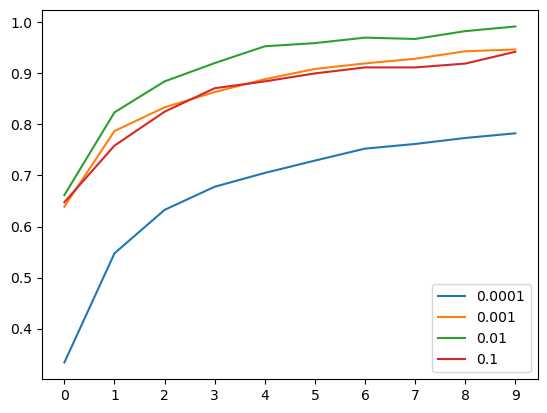

In [24]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label = lr)
    
plt.xticks(np.arange(10))
plt.legend()

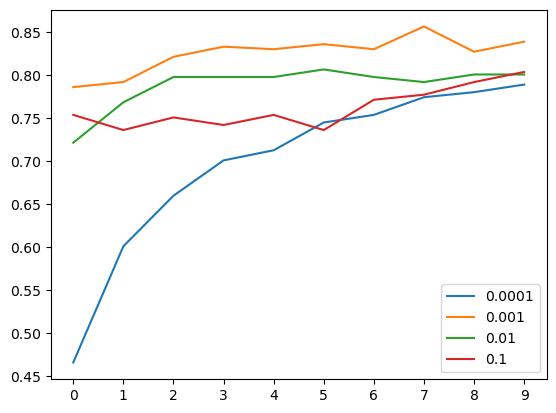

In [25]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label = lr)
    
plt.xticks(np.arange(10))
plt.legend()

In [26]:
del scores[0.1]
del scores[0.0001]

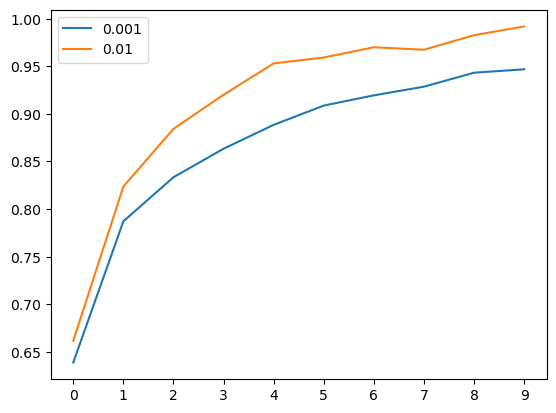

In [27]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label = lr)
    
plt.xticks(np.arange(10))
plt.legend()

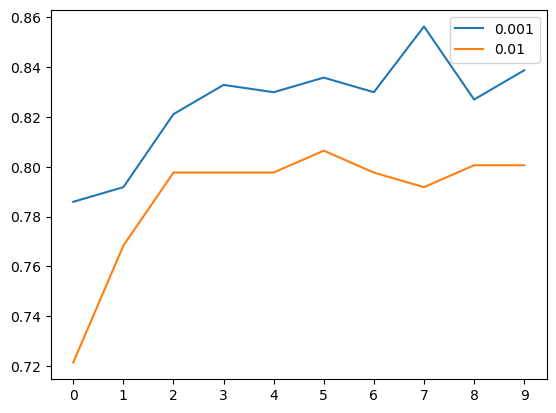

In [28]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label = lr)
    
plt.xticks(np.arange(10))
plt.legend()

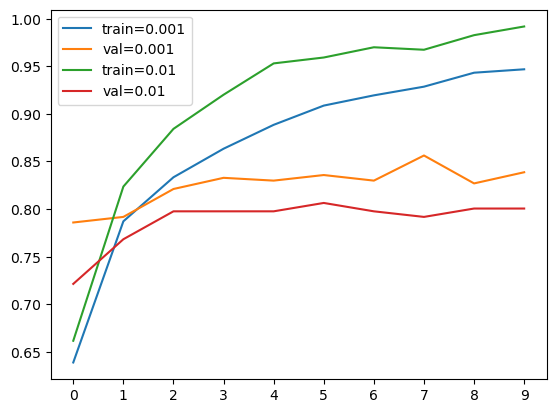

In [29]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label = ('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label = ('val=%s' % lr))
    
plt.xticks(np.arange(10))
plt.legend()

In [30]:
learning_rate = 0.001

### Checkpointing

In [31]:
model.save_weights('model_v1.h5', save_format='h5')

In [32]:
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5' 

'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'

In [33]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [34]:
learning_rate = 0.001

model = make_model(learning_rate = learning_rate)
history = model.fit(train_ds, 
                    epochs=10, 
                    validation_data=val_ds,
                   callbacks=[checkpoint])


Epoch 1/10
96/96 [==============================] - 14s 124ms/step - loss: 1.1040 - accuracy: 0.6226 - val_loss: 0.7122 - val_accuracy: 0.7771
Epoch 2/10
96/96 [==============================] - 11s 115ms/step - loss: 0.6377 - accuracy: 0.7748 - val_loss: 0.6171 - val_accuracy: 0.8035
Epoch 3/10
96/96 [==============================] - 11s 113ms/step - loss: 0.5100 - accuracy: 0.8246 - val_loss: 0.5858 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 11s 115ms/step - loss: 0.4360 - accuracy: 0.8615 - val_loss: 0.5599 - val_accuracy: 0.8240
Epoch 5/10
96/96 [==============================] - 11s 112ms/step - loss: 0.3720 - accuracy: 0.8866 - val_loss: 0.5624 - val_accuracy: 0.8094
Epoch 6/10
96/96 [==============================] - 11s 112ms/step - loss: 0.3306 - accuracy: 0.9055 - val_loss: 0.5687 - val_accuracy: 0.8182
Epoch 7/10
96/96 [==============================] - 11s 112ms/step - loss: 0.2925 - accuracy: 0.9205 - val_loss: 0.5296 - val_accuracy: 0.8240

### Adding more layers

In [20]:
def make_model(learning_rate = 0.01, size_inner=100):
    base_model = Xception(
    weights='imagenet',
    include_top = False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False
    
    ###########################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    
    ###########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [36]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)
    
    model = make_model(learning_rate = lr, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 14s 120ms/step - loss: 1.8488 - accuracy: 0.3475 - val_loss: 1.6341 - val_accuracy: 0.4575
Epoch 2/10
96/96 [==============================] - 11s 112ms/step - loss: 1.5417 - accuracy: 0.4795 - val_loss: 1.5434 - val_accuracy: 0.4282
Epoch 3/10
96/96 [==============================] - 11s 111ms/step - loss: 1.4332 - accuracy: 0.5049 - val_loss: 1.4648 - val_accuracy: 0.4985
Epoch 4/10
96/96 [==============================] - 11s 112ms/step - loss: 1.3343 - accuracy: 0.5394 - val_loss: 1.4483 - val_accuracy: 0.5161
Epoch 5/10
96/96 [==============================] - 11s 111ms/step - loss: 1.2811 - accuracy: 0.5476 - val_loss: 1.4263 - val_accuracy: 0.5220
Epoch 6/10
96/96 [==============================] - 11s 110ms/step - loss: 1.2355 - accuracy: 0.5665 - val_loss: 1.4038 - val_accuracy: 0.5279
Epoch 7/10
96/96 [==============================] - 11s 110ms/step - loss: 1.1993 - accuracy: 0.5694 - val_loss: 1.4073 - val_accuracy: 0.5

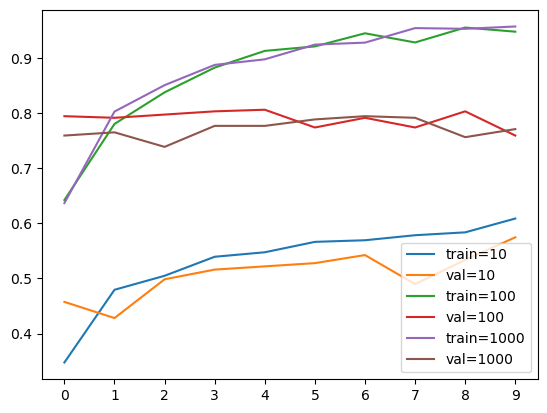

In [40]:
for size, hist in scores.items():
    plt.plot(hist['accuracy'], label = ('train=%s' % size))
    plt.plot(hist['val_accuracy'], label = ('val=%s' % size))
    
plt.xticks(np.arange(10))
plt.legend()

In [41]:
del scores[10]

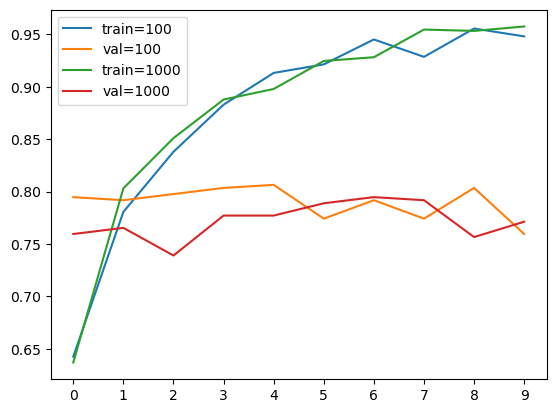

In [42]:
for size, hist in scores.items():
    plt.plot(hist['accuracy'], label = ('train=%s' % size))
    plt.plot(hist['val_accuracy'], label = ('val=%s' % size))
    
plt.xticks(np.arange(10))
plt.legend()

In [43]:
learning_rate = 0.001
size = 100

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

model = make_model(learning_rate = learning_rate, size_inner=size)
history = model.fit(train_ds, 
                    epochs=10, 
                    validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/10
96/96 [==============================] - 14s 122ms/step - loss: 0.9677 - accuracy: 0.6626 - val_loss: 0.6784 - val_accuracy: 0.7566
Epoch 2/10
96/96 [==============================] - 11s 112ms/step - loss: 0.5143 - accuracy: 0.8224 - val_loss: 0.6272 - val_accuracy: 0.7625
Epoch 3/10
96/96 [==============================] - 11s 112ms/step - loss: 0.3810 - accuracy: 0.8683 - val_loss: 0.5199 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 11s 112ms/step - loss: 0.2673 - accuracy: 0.9140 - val_loss: 0.5156 - val_accuracy: 0.8328
Epoch 5/10
96/96 [==============================] - 11s 109ms/step - loss: 0.1892 - accuracy: 0.9456 - val_loss: 0.5273 - val_accuracy: 0.8328
Epoch 6/10
96/96 [==============================] - 11s 111ms/step - loss: 0.1388 - accuracy: 0.9681 - val_loss: 0.5546 - val_accuracy: 0.8182
Epoch 7/10
96/96 [==============================] - 11s 111ms/step - loss: 0.0952 - accuracy: 0.9834 - val_loss: 0.6111 - val_accuracy: 0.8123

## Regularization and Dropout

In [22]:
def make_model(learning_rate = 0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
    weights='imagenet',
    include_top = False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False
    
    ###########################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    # drop rate comes after dense layers and rate represents how much network we freeze
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    ###########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [26]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)
    
    model = make_model(
        learning_rate = learning_rate, 
        size_inner=size,
        droprate=droprate
    )
    
    # Now that we have added droprate Neural Network will need more iterations than 10
    # So we need to increase epochs
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 15s 136ms/step - loss: 0.9389 - accuracy: 0.6698 - val_loss: 0.6241 - val_accuracy: 0.7859
Epoch 2/30
96/96 [==============================] - 12s 126ms/step - loss: 0.5138 - accuracy: 0.8123 - val_loss: 0.6217 - val_accuracy: 0.7801
Epoch 3/30
96/96 [==============================] - 12s 126ms/step - loss: 0.3539 - accuracy: 0.8869 - val_loss: 0.6145 - val_accuracy: 0.7889
Epoch 4/30
96/96 [==============================] - 12s 127ms/step - loss: 0.2529 - accuracy: 0.9211 - val_loss: 0.5978 - val_accuracy: 0.7977
Epoch 5/30
96/96 [==============================] - 12s 127ms/step - loss: 0.1797 - accuracy: 0.9534 - val_loss: 0.5486 - val_accuracy: 0.8152
Epoch 6/30
96/96 [==============================] - 12s 127ms/step - loss: 0.1305 - accuracy: 0.9694 - val_loss: 0.5998 - val_accuracy: 0.8211
Epoch 7/30
96/96 [==============================] - 12s 127ms/step - loss: 0.0892 - accuracy: 0.9840 - val_loss: 0.6000 - val_accuracy: 0.

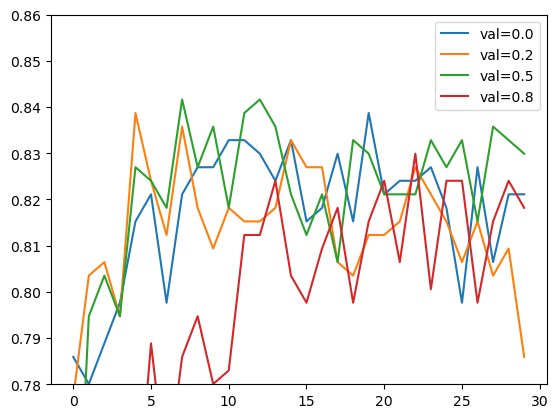

In [57]:
for droprate, hist in scores.items():
#     plt.plot(hist['accuracy'], label = ('train=%s' % droprate))
    plt.plot(hist['val_accuracy'], label = ('val=%s' % droprate))
    
# plt.xticks(np.arange(10))
plt.ylim(0.78, 0.86)
plt.legend()

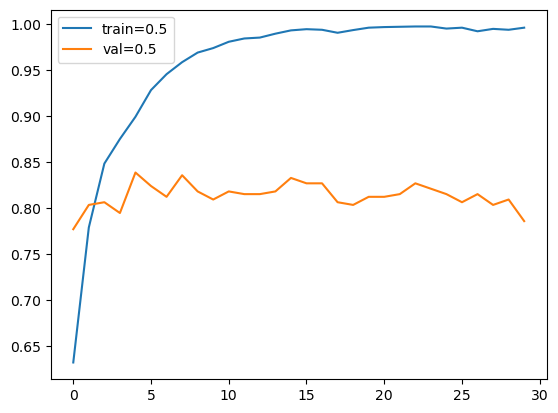

In [63]:
hist = scores[0.2]
plt.plot(hist['accuracy'], label = ('train=%s' % 0.5))
plt.plot(hist['val_accuracy'], label = ('val=%s' % 0.5))
plt.legend()

## Regularization using Data Augmentation

In [52]:
#rotations

In [55]:
# Load image and apply preprocess_input function
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
#     rotation_range=30,
#     width_shift_range=10,
#     height_shift_range=10,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True
)
# horizontal flip is not interesting for us since we're only interested in shirt not flipped shirt

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32)


# Loading Validation data same as above

# Load image and apply preprocess_input function
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False) # WE don't need to shuffle since its just for validating

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [54]:
## How to choose which data augmentation parameters I need or not need
# 1. Use your own judgement
# 2. Look at the dataset and see what kind of variations are there. Are the 
# objects always centered?
# 3. Tune it as a hyperparameter. Train it for 10-20 epochs. Is it better? Yes? Use No? Don't use

In [64]:
learning_rate = 0.001
size = 100
droprate = 0.5

model = make_model(
    learning_rate = learning_rate, 
    size_inner=size,
    droprate=droprate
)

# increasing epochs too
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 28s 267ms/step - loss: 1.5374 - accuracy: 0.4866 - val_loss: 0.9573 - val_accuracy: 0.6628
Epoch 2/50
96/96 [==============================] - 25s 257ms/step - loss: 1.1328 - accuracy: 0.6209 - val_loss: 0.7665 - val_accuracy: 0.7214
Epoch 3/50
96/96 [==============================] - 25s 258ms/step - loss: 0.9907 - accuracy: 0.6646 - val_loss: 0.7258 - val_accuracy: 0.7449
Epoch 4/50
96/96 [==============================] - 25s 256ms/step - loss: 0.9420 - accuracy: 0.6754 - val_loss: 0.6958 - val_accuracy: 0.7713
Epoch 5/50
96/96 [==============================] - 25s 258ms/step - loss: 0.8779 - accuracy: 0.7027 - val_loss: 0.6562 - val_accuracy: 0.7683
Epoch 6/50
96/96 [==============================] - 25s 257ms/step - loss: 0.8358 - accuracy: 0.7154 - val_loss: 0.6478 - val_accuracy: 0.7595
Epoch 7/50
96/96 [==============================] - 25s 256ms/step - loss: 0.8241 - accuracy: 0.7158 - val_loss: 0.6122 - val_accuracy: 0.7918

In [95]:
import pandas as pd
pd.DataFrame(data = (history.history['accuracy'], history.history['val_accuracy']))[[40]]

,40
0,0.844524
1,0.815249


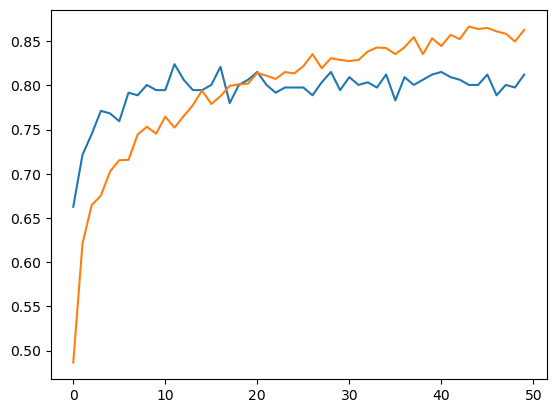

In [74]:
hist = history.history
plt.plot(hist['val_accuracy'], label = 'val')
plt.plot(hist['accuracy'], label = 'train')

## 8.11 Training a larger model

<ul><li>Train a 299x299 model</li></ul>

we used smaller model before so it wil train 4 times fast and let us iterate over and tune it

In [98]:
def make_model(input_size = 150, 
               learning_rate = 0.01, 
               size_inner=100, 
               droprate=0.5):
    base_model = Xception(
    weights='imagenet',
    include_top = False,
    input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False
    
    ###########################################################
    
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    # drop rate comes after dense layers and rate represents how much network we freeze
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    ###########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # because multiclass classification
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [99]:
input_size = 299

In [100]:
# Load image and apply preprocess_input function
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
#     rotation_range=30,
#     width_shift_range=10,
#     height_shift_range=10,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True
)
# horizontal flip is not interesting for us since we're only interested in shirt not flipped shirt

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32)


# Loading Validation data same as above

# Load image and apply preprocess_input function
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False) # WE don't need to shuffle since its just for validating

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [103]:
learning_rate = 0.001
size = 100
droprate = 0.5

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

model = make_model(
    input_size = input_size,
    learning_rate = learning_rate, 
    size_inner=size,
    droprate=droprate    
)

# increasing epochs too
history = model.fit(train_ds, 
                    epochs=50, 
                    validation_data=val_ds, 
                    callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 71s 695ms/step - loss: 1.2822 - accuracy: 0.5874 - val_loss: 0.6138 - val_accuracy: 0.8152
Epoch 2/50
96/96 [==============================] - 65s 673ms/step - loss: 0.8428 - accuracy: 0.7252 - val_loss: 0.5314 - val_accuracy: 0.8182
Epoch 3/50
96/96 [==============================] - 65s 679ms/step - loss: 0.7242 - accuracy: 0.7608 - val_loss: 0.4674 - val_accuracy: 0.8475
Epoch 4/50
96/96 [==============================] - 65s 675ms/step - loss: 0.6759 - accuracy: 0.7784 - val_loss: 0.4694 - val_accuracy: 0.8446
Epoch 5/50
96/96 [==============================] - 66s 683ms/step - loss: 0.6078 - accuracy: 0.7979 - val_loss: 0.4367 - val_accuracy: 0.8504
Epoch 6/50
96/96 [==============================] - 64s 670ms/step - loss: 0.5823 - accuracy: 0.8096 - val_loss: 0.4212 - val_accuracy: 0.8504
Epoch 7/50
96/96 [==============================] - 64s 668ms/step - loss: 0.5543 - accuracy: 0.8132 - val_loss: 0.4397 - val_accuracy: 0.8328

In [133]:
dict(zip(history.history['accuracy'], history.history['val_accuracy']))

{0.5873533487319946: 0.8152492642402649,
 0.7252281904220581: 0.8181818127632141,
 0.7607561945915222: 0.8475073575973511,
 0.778357207775116: 0.8445748090744019,
 0.7979139685630798: 0.8504399061203003,
 0.8096479773521423: 0.8504399061203003,
 0.8132333755493164: 0.8328445553779602,
 0.8174706697463989: 0.8357771039009094,
 0.825945258140564: 0.8533724546432495,
 0.8256192803382874: 0.8475073575973511,
 0.8223598599433899: 0.8621701002120972,
 0.8461538553237915: 0.8533724546432495,
 0.8425684571266174: 0.8504399061203003,
 0.8556062579154968: 0.8416422009468079,
 0.8539765477180481: 0.8416422009468079,
 0.857887864112854: 0.8475073575973511,
 0.8601694703102112: 0.8504399061203003,
 0.8657105565071106: 0.8533724546432495,
 0.8676662445068359: 0.8651026487350464,
 0.8715775609016418: 0.8533724546432495,
 0.8696219325065613: 0.8387096524238586,
 0.87874835729599: 0.8563050031661987,
 0.8833116292953491: 0.8387096524238586,
 0.8855932354927063: 0.8563050031661987,
 0.8927640318870544: 

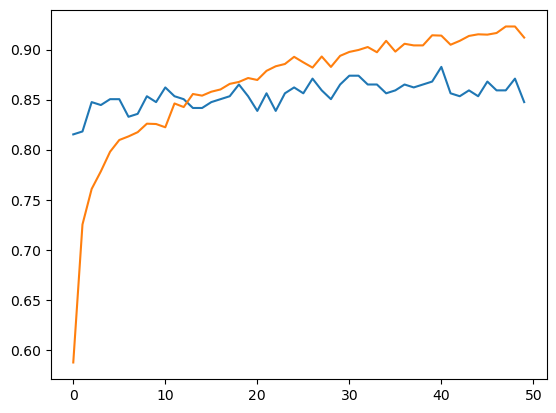

In [106]:
hist = history.history
plt.plot(hist['val_accuracy'], label = 'val')
plt.plot(hist['accuracy'], label = 'train')

## Using the model

In [108]:
import tensorflow as tf
from tensorflow import keras

In [110]:
model = keras.models.load_model('xception_v4_41_0.883.h5')

In [115]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [112]:
# Reading test dataset

test_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False) 

Found 372 images belonging to 10 classes.


In [113]:
model.evaluate(test_ds)

12/12 [==============================] - 4s 273ms/step - loss: 0.2850 - accuracy: 0.9059


[0.28497058153152466, 0.9059139490127563]

In [114]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [118]:
img = load_img(path, target_size=(299, 299))

In [119]:
import numpy as np

In [125]:
# one image loaded
x = np.array(img)
#capital case (batch of images)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [126]:
X = preprocess_input(X)

In [128]:
pred = model.predict(X)

1/1 [==============================] - 0s 22ms/step


In [129]:
pred[0]

array([-4.7212853, -9.858184 , -1.859479 , -4.698464 , 11.373533 ,
       -5.3111997, -6.641865 ,  5.2907076, -2.8348298, -5.794948 ],
      dtype=float32)

In [130]:
classes = ['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [131]:
# logits - relative likelihood of belonging to the class
dict(zip(classes, pred[0]))

{'dress': -4.7212853,
 'hat': -9.858184,
 'longsleeve': -1.859479,
 'outwear': -4.698464,
 'pants': 11.373533,
 'shirt': -5.3111997,
 'shoes': -6.641865,
 'shorts': 5.2907076,
 'skirt': -2.8348298,
 't-shirt': -5.794948}